Example No.: 03
------

In [2]:
#step 1: Importing Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
#Step 2: Inserting Data

data = pd.read_csv('/content/StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
#step 3: Data understanding

data.columns
data.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
#Step 4: Data cleaning but there was no null values in this data set

data.isnull().sum()
data.drop_duplicates()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
#Removing outliers using z test

def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data['math score']))
    filtered_data = data[z_scores < threshold]
    return filtered_data

filtered_data = remove_outliers_zscore(data)
print(f"Data after Z-score outlier removal: \n{filtered_data}")

Data after Z-score outlier removal: 
     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      non

#Step No.: 5 EDA

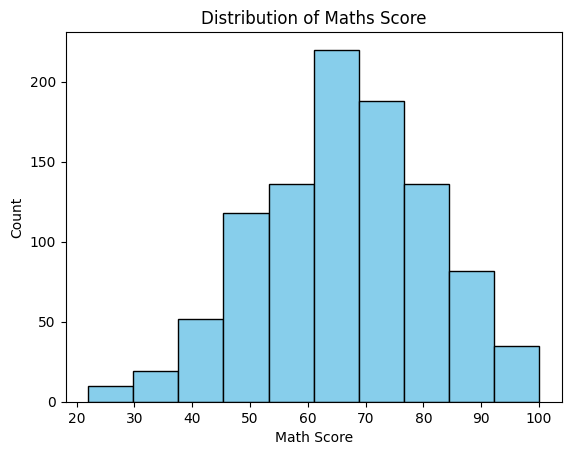

In [ ]:
plt.hist(filtered_data['math score'], bins=10, color='skyBlue', edgecolor='Black')
plt.xlabel("Math Score")
plt.ylabel("Count")
plt.title("Distribution of Maths Score")
plt.show()

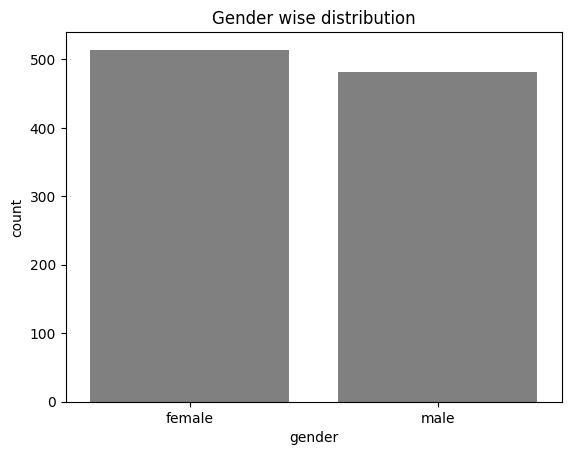

In [ ]:
sns.countplot(x=filtered_data['gender'], color='Grey')
plt.title("Gender wise distribution")
plt.show()

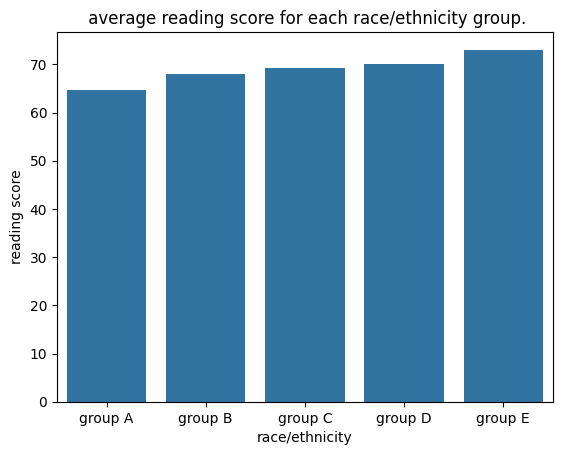

In [ ]:
value = filtered_data.groupby('race/ethnicity')['reading score'].mean().reset_index()

sns.barplot(x='race/ethnicity', y='reading score', data=value)
plt.title(" average reading score for each race/ethnicity group.")
plt.show()

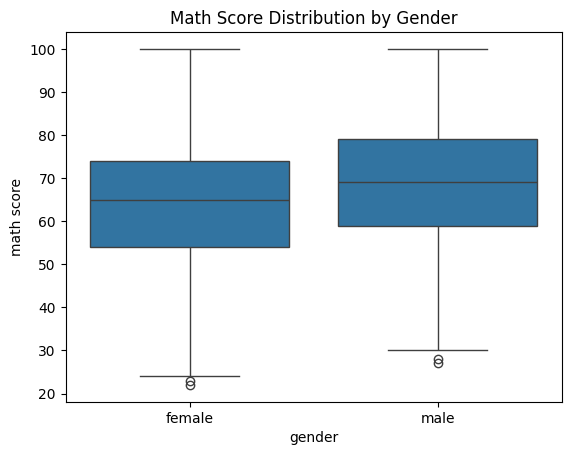

In [ ]:
sns.boxplot(x='gender', y='math score', data=filtered_data)
plt.title("Math Score Distribution by Gender")
plt.show()

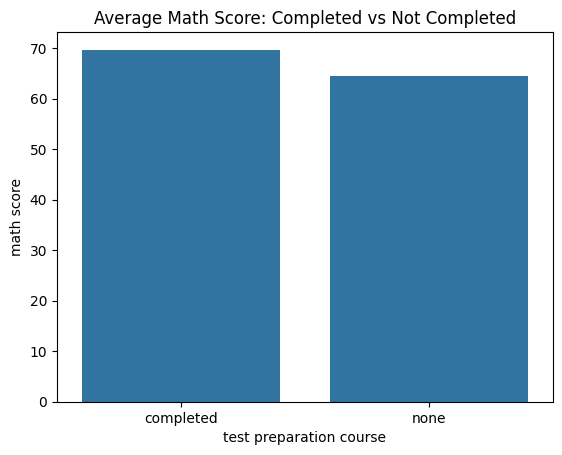

In [ ]:
value = filtered_data.groupby('test preparation course')['math score'].mean().reset_index()
sns.barplot(x='test preparation course',y ='math score',data=value)
plt.title("Average Math Score: Completed vs Not Completed")
plt.show()

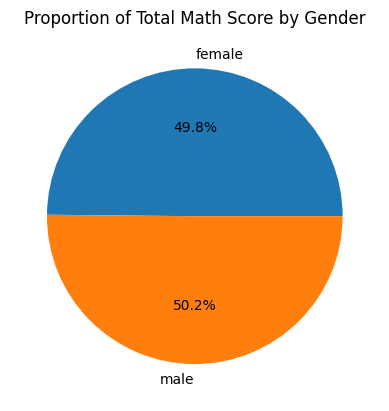

In [11]:
score_by_gender = filtered_data.groupby('gender')['math score'].sum()
plt.pie(score_by_gender.values, labels=score_by_gender.index, autopct='%1.1f%%')
plt.title('Proportion of Total Math Score by Gender')
plt.show()

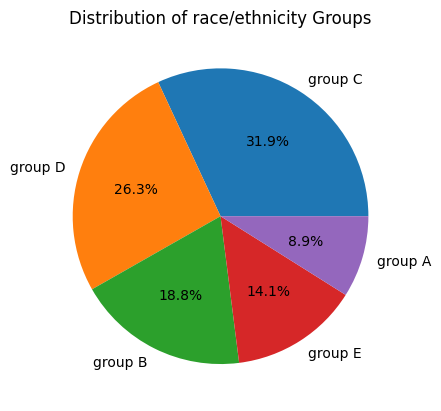

In [13]:
# 1. Count the students in each new group
group_counts = filtered_data['race/ethnicity'].value_counts()

# 2. Create the pie chart
plt.pie(group_counts.values,
        labels=group_counts.index,
        autopct='%1.1f%%')
plt.title('Distribution of race/ethnicity Groups')
plt.show()

#Step No.: 06 Summary

1. Most of the students got their maximum math score is between 60 to 80.
2. count of female students is little bit more than male students
3. Group E got Highest average reading score and Group A got lowest average reading score among all the goups of race/ethnicity
4. male students score higher marks in maths than female students
5. the students who completed their test preparation course got more marks in maths than the students who not completed their course.

#Additional Practise Questions:

Questions:
---

Load the dataset and display the first 5 rows.

How many rows and columns does the dataset have?

What are the column names in the dataset?

What are the data types of each column?

Are there any missing values in the dataset?

Display basic summary statistics for the numerical columns.

What are the unique values in the gender column, and how many of each?

What are the unique values in the race/ethnicity column?

What are the unique values in the parental level of education column?

What are the unique values in the lunch and test preparation course columns?

In [ ]:
filtered_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
col, row = filtered_data.shape
print("Number of columns: ",col)
print("Number of Rows: ",row)

Number of columns:  996
Number of Rows:  8


In [ ]:
colm = filtered_data.columns
print("Names of Columns: ",colm)

Names of Columns:  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       996 non-null    object
 1   race/ethnicity               996 non-null    object
 2   parental level of education  996 non-null    object
 3   lunch                        996 non-null    object
 4   test preparation course      996 non-null    object
 5   math score                   996 non-null    int64 
 6   reading score                996 non-null    int64 
 7   writing score                996 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.0+ KB


In [ ]:
ans = filtered_data.isnull().values.any()

if(ans == "np.True_"):
  print("There are some missing values!!")

else:
  print("No missing values!!!")

No missing values!!!


In [ ]:
print("Stastical Info:")
filtered_data.describe()

Stastical Info:


,math score,reading score,writing score
count,996.000000,996.000000,996.000000
mean,66.309237,69.335341,68.233936
std,14.780428,14.382080,14.948504
min,22.000000,23.000000,15.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [ ]:
types = filtered_data['gender'].unique()
val = filtered_data['gender'].value_counts()

print("Types: ",types)
print("Values: ",val)

Types:  ['female' 'male']
Values:  gender
female    514
male      482
Name: count, dtype: int64


In [ ]:
values = filtered_data['race/ethnicity'].unique
print("Unique Values: ",values)

Unique Values:  <bound method Series.unique of 0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race/ethnicity, Length: 996, dtype: object>


In [ ]:
print("Unique values: \n",filtered_data['parental level of education'].unique())


Unique values: 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [ ]:
val = filtered_data['lunch'].unique()
print(val)

val2 = filtered_data['test preparation course'].unique()
print(val2)

['standard' 'free/reduced']
['none' 'completed']


Questions:
----

What is the average math score of all students?

What are the highest and lowest reading scores?

What is the average writing score of males and females?

What is the average math score for each race/ethnicity group?

Which parental level of education group has the highest average writing score?

In [ ]:
avg = filtered_data['math score'].mean()
print("Average Math Score: ",avg)

Average Math Score:  66.30923694779116


In [ ]:
max = filtered_data['reading score'].max()
min = filtered_data['reading score'].min()

print("max reading score: ",max,"and","Min reading score: ",min)

max reading score:  100 and Min reading score:  23


In [ ]:
m = filtered_data.groupby("gender")['writing score'].mean()
print(m)

gender
female    72.850195
male      63.311203
Name: writing score, dtype: float64


In [ ]:
S = filtered_data.groupby('race/ethnicity')['math score'].mean()
print(S)

race/ethnicity
group A    61.629213
group B    64.229947
group C    64.666667
group D    67.362595
group E    73.821429
Name: math score, dtype: float64


In [ ]:
M = filtered_data.groupby('parental level of education')['writing score'].mean()
print(M.idxmax(),":",M.max())

master's degree : 75.67796610169492
